In [2]:
import pandas as pd
import sys, os

sys.path.append(os.path.abspath(os.path.join('../utils')))

In [3]:
from eda_helpers import EDA
from weather_api import HistoricalWeatherFetcher

In [4]:
eda = EDA('../data/processed')
eda.load_cleaned_data()

In [5]:
preprocessed_trip_df=eda.preprocessed_trip
weather_data_loader=HistoricalWeatherFetcher()

In [6]:
preprocessed_trip_df = preprocessed_trip_df.drop('Unnamed: 0', axis=1)

In [7]:
preprocessed_trip_df

,order_id,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,is_weekend,is_holiday,distance,speed
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,0,0,16.123451,624.133590
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,0,0,1.884305,3.845521
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,0,0,13.822393,20.056676
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,0,0,1.511034,6.674507
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,0,0,20.984319,348.126952
...,...,...,...,...,...,...,...,...,...
528415,1637696,"6.448218499999999,3.4772075","6.437787399999999,3.481670199999999",2021-12-30 20:35:06,2021-12-30 21:02:59,0,0,1.254752,2.700005
528416,1637702,"6.442320899999999,3.4736868","6.436589333407897,3.5559738188407835",2021-12-30 20:48:13,2021-12-30 21:43:49,0,0,9.124781,9.846886
528417,1637704,"6.4281982,3.492248","6.448088500000001,3.4775747",2021-12-30 20:51:45,2021-12-30 21:41:32,0,0,2.733704,3.294722
528418,1637705,"6.5869296,3.3632966","6.637906899999999,3.3339515",2021-12-30 20:48:50,2021-12-30 21:08:28,0,0,6.504796,19.878833


In [8]:
trip_df=preprocessed_trip_df.copy()

In [9]:
trip_df['Trip Start Time'] = pd.to_datetime(trip_df['Trip Start Time'])
print(trip_df['Trip Start Time'].dt.date.nunique())

252


In [10]:
trip_df['Trip Start Time'] = pd.to_datetime(trip_df['Trip Start Time'])

trip_df['Time of Day'] = trip_df['Trip Start Time'].dt.hour.apply(lambda x: 'Morning' if x < 12 else 'Afternoon')

In [11]:
unique_dates_and_times = trip_df.groupby([trip_df['Trip Start Time'].dt.date, 'Time of Day']).size().reset_index(name='count')
unique_dates_and_times

,Trip Start Time,Time of Day,count
0,2021-07-01,Afternoon,2218
1,2021-07-01,Morning,1052
2,2021-07-02,Afternoon,2364
3,2021-07-02,Morning,1122
4,2021-07-03,Afternoon,1582
...,...,...,...
448,2022-04-30,Morning,1
449,2022-05-19,Morning,1
450,2022-05-30,Afternoon,1
451,2022-06-03,Afternoon,2


In [12]:
trip_df

,order_id,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,is_weekend,is_holiday,distance,speed,Time of Day
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,0,0,16.123451,624.133590,Morning
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,0,0,1.884305,3.845521,Morning
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,0,0,13.822393,20.056676,Morning
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,0,0,1.511034,6.674507,Morning
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,0,0,20.984319,348.126952,Morning
...,...,...,...,...,...,...,...,...,...,...
528415,1637696,"6.448218499999999,3.4772075","6.437787399999999,3.481670199999999",2021-12-30 20:35:06,2021-12-30 21:02:59,0,0,1.254752,2.700005,Afternoon
528416,1637702,"6.442320899999999,3.4736868","6.436589333407897,3.5559738188407835",2021-12-30 20:48:13,2021-12-30 21:43:49,0,0,9.124781,9.846886,Afternoon
528417,1637704,"6.4281982,3.492248","6.448088500000001,3.4775747",2021-12-30 20:51:45,2021-12-30 21:41:32,0,0,2.733704,3.294722,Afternoon
528418,1637705,"6.5869296,3.3632966","6.637906899999999,3.3339515",2021-12-30 20:48:50,2021-12-30 21:08:28,0,0,6.504796,19.878833,Afternoon


In [13]:
  
trip_origin = (6.508813001668548, 3.37740316890347)
trip_start_time = "2021-07-01 07:28:04"
time_of_day = "afternoon"
weather_data = weather_data_loader.get_daily_weather(trip_origin, trip_start_time, time_of_day)
print(weather_data)

Rainy


In [14]:
trip_origins = trip_df['Trip Origin']

lats = trip_origins.str.split(',').str[0].astype(float)
lngs = trip_origins.str.split(',').str[1].astype(float)

lat_min = min(lats)
lat_max = max(lats)
lng_min = min(lngs)
lng_max = max(lngs)

print(f"Latitude range: {lat_min} to {lat_max}")
print(f"Longitude range: {lng_min} to {lng_max}")


Latitude range: 6.3172023591260915 to 7.718129999999999
Longitude range: 2.8775154 to 8.5222933


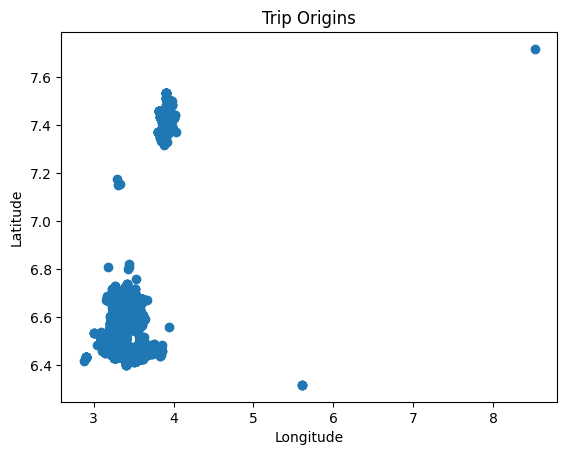

In [15]:
import matplotlib.pyplot as plt

plt.scatter(lngs, lats)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Trip Origins')
plt.show()

In [ ]:
import random

lat_min, lat_max = 6.3172023591260915, 7.718129999999999
lng_min, lng_max = 2.8775154, 4.3

lat_values = [6.6, 7.2, 7.5]  # conditional latitude values
lat_idx = random.randint(0, len(lat_values) - 1)
lat = lat_values[lat_idx]

lng = random.uniform(lng_min, lng_max)

trip_origin = f"{lat},{lng}"


In [16]:
# import folium

# # Create a map centered on the average latitude and longitude
# avg_lat = (lat_min + lat_max) / 2
# avg_lng = (lng_min + lng_max) / 2
# m = folium.Map(location=[avg_lat, avg_lng], zoom_start=6)

# # Add markers for each trip origin
# for trip_origin in trip_origins:
#     lat, lng = trip_origin.split(',')
#     lat, lng = float(lat), float(lng)
#     folium.Marker([lat, lng], popup='Trip Origin').add_to(m)

# # Display the map
# m

In [20]:
unique_trips = trip_df.assign(date=trip_df['Trip Start Time'].dt.date)[['date', 'Time of Day']].drop_duplicates().reset_index(drop=True)

In [23]:
unique_trips

,date,Time of Day,Weather Condition
0,2021-07-01,Morning,None
1,2021-07-02,Morning,None
2,2021-07-01,Afternoon,None
3,2021-07-04,Afternoon,None
4,2021-07-02,Afternoon,None
...,...,...,...
448,2022-03-17,Afternoon,None
449,2022-02-09,Afternoon,None
450,2022-04-22,Morning,None
451,2022-01-08,Morning,None


In [28]:

# create a new column to hold the weather condition
unique_trips['Weather Condition'] = None

# create an instance of the HistoricalWeatherFetcher class
w = HistoricalWeatherFetcher()

# iterate over the unique trips and fetch the weather condition
for index, row in unique_trips.iterrows():
    trip_origin = trip_origin # convert string to tuple
    trip_start_time = row['date']
    time_of_day = row['Time of Day']
    weather_condition = w.get_daily_weather(trip_origin, trip_start_time, time_of_day)
    unique_trips.loc[index, 'Weather Condition'] = weather_condition

print(unique_trips)